In [20]:
from collections import OrderedDict

import torch
import torch.nn as nn
import torchvision
from torchvision import transforms
from torchvision.io import read_image
import torchvision.transforms.functional as F
import json
import random

import numpy as np
import torchvision.transforms
from matplotlib import pyplot as plt
from pathlib import Path
import torch
import torchvision.transforms.functional as ttf
from torchvision.io import read_image
from torch.nn import functional as nnf
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
from torch import optim
from pathlib import Path
import random

from torch.utils.data import Dataset, DataLoader
from torch.utils.data.dataset import T_co
from torchvision import transforms
from torchvision.io import read_image


class Module(nn.Module):
    def __init__(self):
        super(Module, self).__init__()
        self.layer1 = nn.Sequential(OrderedDict([
            ('conv1', nn.Conv2d(in_channels=3, out_channels=64, kernel_size=3, padding=100)),
            ('relu1', nn.ReLU(inplace=True)),
            ('conv2', nn.Conv2d(in_channels=64, out_channels=64, kernel_size=3, padding=1)),
            ('relu2', nn.ReLU(inplace=True)),
            ('pool1', nn.MaxPool2d(kernel_size=2, stride=2))
        ]))
        self.layer2 = nn.Sequential(OrderedDict([
            ('conv3', nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, padding=1)),
            ('relu3', nn.ReLU(inplace=True)),
            ('conv4', nn.Conv2d(in_channels=128, out_channels=128, kernel_size=3, padding=1)),
            ('relu4', nn.ReLU(inplace=True)),
            ('pool2', nn.MaxPool2d(kernel_size=2, stride=2))
        ]))
        self.layer3 = nn.Sequential(OrderedDict([
            ('conv5', nn.Conv2d(in_channels=128, out_channels=256, kernel_size=3, padding=1)),
            ('relu5', nn.ReLU(inplace=True)),
            ('conv6', nn.Conv2d(in_channels=256, out_channels=256, kernel_size=3, padding=1)),
            ('relu6', nn.ReLU(inplace=True)),
            ('conv7', nn.Conv2d(in_channels=256, out_channels=256, kernel_size=3, padding=1)),
            ('relu7', nn.ReLU(inplace=True)),
            ('pool3', nn.MaxPool2d(kernel_size=2, stride=2))
        ]))
        self.layer4 = nn.Sequential(OrderedDict([
            ('conv8', nn.Conv2d(in_channels=256, out_channels=512, kernel_size=3, padding=1)),
            ('relu8', nn.ReLU(inplace=True)),
            ('conv9', nn.Conv2d(in_channels=512, out_channels=512, kernel_size=3, padding=1)),
            ('relu9', nn.ReLU(inplace=True)),
            ('conv10', nn.Conv2d(in_channels=512, out_channels=512, kernel_size=3, padding=1)),
            ('relu10', nn.ReLU(inplace=True)),
            ('pool4', nn.MaxPool2d(kernel_size=2, stride=2))
        ]))
        self.layer5 = nn.Sequential(OrderedDict([
            ('conv11', nn.Conv2d(in_channels=512, out_channels=512, kernel_size=3, padding=1)),
            ('relu11', nn.ReLU(inplace=True)),
            ('conv12', nn.Conv2d(in_channels=512, out_channels=512, kernel_size=3, padding=1)),
            ('relu12', nn.ReLU(inplace=True)),
            ('conv13', nn.Conv2d(in_channels=512, out_channels=512, kernel_size=3, padding=1)),
            ('relu13', nn.ReLU(inplace=True)),
            ('pool5', nn.MaxPool2d(kernel_size=2, stride=2))
        ]))
        self.fc6 = nn.Sequential(OrderedDict([
            ('conv14', nn.Conv2d(in_channels=512, out_channels=4096, kernel_size=7, padding=0)),
            ('relu14', nn.ReLU(inplace=True)),
            ('dropout1', nn.Dropout(p=0.5, inplace=True))
        ]))
        self.fc7 = nn.Sequential(OrderedDict([
            ('conv15', nn.Conv2d(in_channels=4096, out_channels=4096, kernel_size=1, padding=0)),
            ('relu15', nn.ReLU(inplace=True)),
            ('dropout2', nn.Dropout(p=0.5, inplace=True))
        ]))
        self.classifier = nn.Conv2d(in_channels=4096, out_channels=21, kernel_size=1, padding=0)
        for m in self.modules():
            if isinstance(m, nn.Conv2d) or isinstance(m, nn.Linear):
                torch.nn.init.zeros_(m.weight)

    def forward(self, x):
        # 记录输入图像大小
        input_shape = x.shape[-2:]
        # print(x.size())
        x = self.layer1(x)
        # print(x.size())
        x = self.layer2(x)
        # print(x.size())
        x = self.layer3(x)
        # print(x.size())
        x = self.layer4(x)
        # print(x.size())
        x = self.layer5(x)
        # print(x.size())
        x = self.fc6(x)
        # print(x.size())
        x = self.fc7(x)
        # print(x.size())
        x = self.classifier(x)
        # print(x.size())
        x = nnf.interpolate(x, size=input_shape, mode="bilinear", align_corners=False)
        # print(x.size())
        return x

In [21]:
def show(imgs):
    if not isinstance(imgs, list):
        imgs = [imgs]
    fig, axs = plt.subplots(ncols=len(imgs), squeeze=False)
    for i, img in enumerate(imgs):
        img = img.detach()
        img = ttf.to_pil_image(img)
        axs[0, i].imshow(np.asarray(img))
        axs[0, i].set(xticklabels=[], yticklabels=[], xticks=[], yticks=[])

In [11]:
root = r"./data/Pascal VOC 2012/VOCdevkit/VOC2012"
val_txt_path = str(Path(root) / "ImageSets/Segmentation/val.txt")
with open(val_txt_path, "r", encoding="utf-8") as f:
    val_filename_list = f.read().splitlines()
random.shuffle(val_filename_list)
image_list = [read_image(str(Path(root) / "JPEGImages" / (str(filename) + ".jpg"))) for filename in val_filename_list]
target_list = [read_image(str(Path(root) / "SegmentationClass" / (str(filename) + ".png"))) for filename in
               val_filename_list]
len(val_filename_list), len(image_list)

(1449, 1449)

In [12]:
color_json_path = str(Path(root) / "ImageSets/Segmentation/palette.json")
with open(color_json_path, "r", encoding="utf-8") as f:
    color_dict = json.load(f)
class_json_path = str(Path(root) / "ImageSets/Segmentation/pascal_voc_classes.json")
with open(class_json_path, "r", encoding="utf-8") as f:
    class_dict = json.load(f)
color_dict, class_dict

({'0': [0, 0, 0],
  '1': [128, 0, 0],
  '2': [0, 128, 0],
  '3': [128, 128, 0],
  '4': [0, 0, 128],
  '5': [128, 0, 128],
  '6': [0, 128, 128],
  '7': [128, 128, 128],
  '8': [64, 0, 0],
  '9': [192, 0, 0],
  '10': [64, 128, 0],
  '11': [192, 128, 0],
  '12': [64, 0, 128],
  '13': [192, 0, 128],
  '14': [64, 128, 128],
  '15': [192, 128, 128],
  '16': [0, 64, 0],
  '17': [128, 64, 0],
  '18': [0, 192, 0],
  '19': [128, 192, 0],
  '20': [0, 64, 128],
  '21': [128, 64, 128],
  '22': [0, 192, 128],
  '23': [128, 192, 128],
  '24': [64, 64, 0],
  '25': [192, 64, 0],
  '26': [64, 192, 0],
  '27': [192, 192, 0],
  '28': [64, 64, 128],
  '29': [192, 64, 128],
  '30': [64, 192, 128],
  '31': [192, 192, 128],
  '32': [0, 0, 64],
  '33': [128, 0, 64],
  '34': [0, 128, 64],
  '35': [128, 128, 64],
  '36': [0, 0, 192],
  '37': [128, 0, 192],
  '38': [0, 128, 192],
  '39': [128, 128, 192],
  '40': [64, 0, 64],
  '41': [192, 0, 64],
  '42': [64, 128, 64],
  '43': [192, 128, 64],
  '44': [64, 0, 192]

In [13]:
from torchvision.models.segmentation import FCN_ResNet50_Weights

# 预训练时的类别，被保存在预训练权重weight里
sem_class_to_idx = {cls: idx for (idx, cls) in enumerate(FCN_ResNet50_Weights.DEFAULT.meta["categories"])}
num_classes = len(sem_class_to_idx)

model = Module()

torch.Size([1, 21, 500, 375])
torch.Size([1, 21, 500, 375]) torch.Size([21, 500, 375])


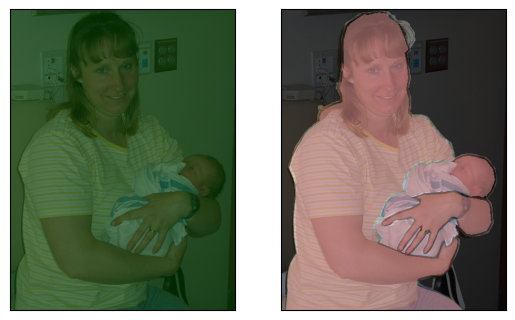

In [77]:
from torchvision.utils import draw_segmentation_masks

simple_num = 1  # 预测样本数量，通过切片实现

for i in range(simple_num):
    img = image_list[i]
    img_float = ttf.convert_image_dtype(img).unsqueeze(0)
    # 对21种类别做了判断，所以有dim=1的长度为21
    out_img = model(img_float)
    # 对每个像素的预测结果维度归一化
    normalized_masks = out_img.softmax(dim=1)
    print(normalized_masks.size())
    out_masks = normalized_masks.argmax(1) == torch.arange(num_classes)[:, None, None, None]
    out_masks = out_masks.swapaxes(0, 1)
    target_mask = target_list[i][0] == torch.arange(num_classes)[:, None, None]
    # target_mask = target_mask.swapaxes(0, 1)
    print(out_masks.size(), target_mask.size())
    out_masks = torch.cat([out_masks, target_mask.unsqueeze(0)], dim=0)
    img_with_masks = [
        draw_segmentation_masks(img, masks=mask, alpha=.6, colors=[tuple(value) for value in color_dict.values()])
        for mask in out_masks
    ]
    show(img_with_masks)

In [14]:
epochs = 3
batch_size = 10
learn_rate = 0.1
momentum = 0.9
optimizer = optim.SGD(model.parameters(), lr=learn_rate, momentum=momentum)
criterion = nn.CrossEntropyLoss()

In [43]:
class VOCDataset(Dataset):
    def __init__(self, root, img_set, crop_size):
        super().__init__()
        # root = r"./data/Pascal VOC 2012/VOCdevkit/VOC2012"
        self.root = root
        self.img_set = img_set
        self.crop_size = crop_size
        self.txt_path = str(Path(self.root) / ("ImageSets/Segmentation/" + self.img_set + ".txt"))
        with open(self.txt_path, "r", encoding="utf-8") as f:
            self.filename_list = f.read().splitlines()
        random.shuffle(self.filename_list)
        self.image_list = [read_image(str(Path(root) / "JPEGImages" / (str(filename) + ".jpg")))
                           for filename in self.filename_list]
        self.target_list = [read_image(str(Path(root) / "SegmentationClass" / (str(filename) + ".png")))
                            for filename in self.filename_list]
        self.image_list = [img
                           for img in self.image_list
                           if img.shape[1] >= crop_size[0] and img.shape[2] >= crop_size[1]]
        self.target_list = [img.where(img != 255, 0)
                            for img in self.target_list
                            if img.shape[1] >= crop_size[0] and img.shape[2] >= crop_size[1]]
        self.length = len(self.image_list)
        self.color_json_path = str(Path(root) / "ImageSets/Segmentation/palette.json")
        with open(color_json_path, "r", encoding="utf-8") as f:
            self.color_dict = json.load(f)
        self.class_json_path = str(Path(root) / "ImageSets/Segmentation/pascal_voc_classes.json")
        with open(class_json_path, "r", encoding="utf-8") as f:
            self.class_dict = json.load(f)

    def __getitem__(self, index) -> T_co:
        image = self.image_list[index]
        target = self.target_list[index]
        position = transforms.RandomCrop.get_params(image, self.crop_size)
        image = ttf.crop(image, *position).type(torch.float)
        target = ttf.crop(target, *position).type(torch.int64)
        target = target.squeeze(0)
        return image, target

    def __add__(self, other: 'Dataset[T_co]') -> 'ConcatDataset[T_co]':
        return super().__add__(other)

    def __len__(self) -> int:
        return self.length

In [44]:
train_data = VOCDataset(root="./data/Pascal VOC 2012/VOCdevkit/VOC2012", img_set="train", crop_size=(224, 224))
val_data = VOCDataset(root="./data/Pascal VOC 2012/VOCdevkit/VOC2012", img_set="val", crop_size=(224, 224))
train_loader = DataLoader(dataset=train_data,
                          batch_size=batch_size,
                          shuffle=True)
val_loader = DataLoader(dataset=val_data,
                        batch_size=batch_size,
                        shuffle=True)

In [30]:
for batch_idx, (data, target) in enumerate(train_loader):
    print(torch.unique(target))

tensor([  0, 255])
tensor([  0, 255])
tensor([  0, 255])
tensor([  0, 255])
tensor([  0, 255])
tensor([  0, 255])
tensor([  0, 255])
tensor([  0, 255])
tensor([  0, 255])
tensor([  0, 255])
tensor([  0, 255])
tensor([  0, 255])
tensor([  0, 255])
tensor([  0, 255])
tensor([  0, 255])
tensor([  0, 255])
tensor([  0, 255])
tensor([  0, 255])
tensor([  0, 255])
tensor([  0, 255])
tensor([  0, 255])
tensor([  0, 255])
tensor([  0, 255])
tensor([  0, 255])
tensor([  0, 255])
tensor([  0, 255])
tensor([  0, 255])
tensor([  0, 255])
tensor([  0, 255])
tensor([  0, 255])
tensor([  0, 255])
tensor([  0, 255])
tensor([  0, 255])
tensor([  0, 255])
tensor([  0, 255])
tensor([  0, 255])
tensor([  0, 255])
tensor([  0, 255])
tensor([  0, 255])
tensor([  0, 255])
tensor([  0, 255])
tensor([  0, 255])
tensor([  0, 255])
tensor([  0, 255])
tensor([  0, 255])
tensor([  0, 255])
tensor([  0, 255])
tensor([  0, 255])
tensor([  0, 255])
tensor([  0, 255])
tensor([  0, 255])
tensor([  0, 255])
tensor([  0,

In [142]:
# 运行主训练循环
model.train()
for epoch in range(epochs):
    for batch_idx, (data, target) in enumerate(train_loader):
        # 将数据大小从 (batch_size, 1, 28, 28) 变为 (batch_size, 28*28)
        # data = data.view(-1, 28 * 28)
        output = model(data)
        # normalized_masks = output.softmax(dim=1)
        # print(normalized_masks.size())
        # out_masks = normalized_masks.argmax(1) == torch.arange(num_classes)[:, None, None, None]
        # out_masks = out_masks.swapaxes(0, 1)
        # target_mask = target == torch.arange(num_classes)[:, None, None, None]
        # print(output, target.type(torch.int32))
        loss = criterion(output, target)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        if batch_idx % 1000 == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, batch_idx * len(data), len(train_loader.dataset),
                       100. * batch_idx / len(train_loader), loss.data.item()))

IndexError: Target 255 is out of bounds.

In [42]:
tmp = read_image("./data/Pascal VOC 2012/VOCdevkit/VOC2012/SegmentationClass/2007_000068.png")
# tmp = ttf.convert_image_dtype(tmp, torch.float)
# tensor([  0,  19, 255], dtype=torch.uint8)
# tmp.shape
tmp = tmp.where(tmp == 255, 0)
torch.unique(tmp)

tensor([  0, 255], dtype=torch.uint8)

In [193]:
from PIL import Image

tmp = Image.open("./data/Pascal VOC 2012/VOCdevkit/VOC2012/SegmentationClass/2007_000068.png").convert("RGB")
# tmp.type(torch.long)
# torch.unique(tmp)
# tensor([  0,   3, 255], dtype=torch.uint8)
# tmp = torch.tensor(tmp)
# tmp = torchvision.transforms.functional.to_tensor(tmp)
# tmp[0][0][454]
tt = tmp.cpu().numpy()
a = 1

KeyboardInterrupt: 